# User-Based Collaborative Filtering Recommender System

In [1]:
import pickle
import numpy as np               # Python library for numerical computation (that is basically used to perform operations on arrays and matrices)
import pandas as pd              # Python library for easy to use data structures
import scipy as sp               # Python library for numerical algorithms
from matplotlib import pyplot    # Python library for plotting data
import matplotlib.pyplot as plt  # Python library to plot data
import seaborn as sns            # Python library based on matplotlib 
import missingno as msno         # Python library to detect missing numbers
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
pd.set_option('display.max_colwidth',100)

# This data is available on open online source. the original data contains around 100000 data. However, for simplicity of implementation I used first 10000 data

# To read data from CSV file which is used for this Hotel recommendation system
data = pd.read_csv('Hotel_Reviews.csv')

# To show the data of CSV file
data.head()

,Hotel_Id,Property_Name,Review_Title,Review_Text,Location_of _The _Reviewer,Date_Of_Review
0,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012
1,2.000,Corinthia Hotel London,"By far, my best hotel in the world",I had a pleasure of staying in this hotel for 7 nights recently. This hotel was perfect in every...,"Savannah, Georgia",3/23/2016
2,3.000,The Savoy,First visit to the American Bar at the Savoy,"A very lovely first visit to this iconic hotel bar! | Wonderful service, without being intrusive...",London,7/30/2013
3,4.000,Rhodes Hotel,Nice stay,"3 of us stayed at the Rhodes Hotel for 4 nights, its a great location for taking the Paddington ...","Maui, Hawaii",06/02/2012
4,5.000,The Savoy,Perfection,Form the moment we arrived until we left we experienced absolute perfection in service excellanc...,"London, United Kingdom",11/24/2017


In [4]:
# This command will indicate list of all columns used in CSV 
data.columns

Index(['Hotel_Id', 'Property_Name', 'Review_Title', 'Review_Text',
       'Location_of _The _Reviewer', 'Date_Of_Review'],
      dtype='object')

In [5]:
# This command provides total descriptions of CSV
data.describe()

,Hotel_Id
count,9999.000
mean,5000.000
std,2886.607
min,1.000
25%,2500.500
50%,5000.000
75%,7499.500
max,9999.000


In [6]:
data.describe(include='all')

,Hotel_Id,Property_Name,Review_Title,Review_Text,Location_of _The _Reviewer,Date_Of_Review
count,9999.000,9997,9997,9997,8575,9996
unique,NaN,20,8674,9997,3297,3045
top,NaN,The Savoy,Excellent,"excellent and elegant experience, very freindly staff. nice location quiet. very clean and relat...","London, United Kingdom",10/03/2018
freq,NaN,1995,42,1,722,19
mean,5000.000,NaN,NaN,NaN,NaN,NaN
std,2886.607,NaN,NaN,NaN,NaN,NaN
min,1.000,NaN,NaN,NaN,NaN,NaN
25%,2500.500,NaN,NaN,NaN,NaN,NaN
50%,5000.000,NaN,NaN,NaN,NaN,NaN
75%,7499.500,NaN,NaN,NaN,NaN,NaN


In [7]:
# Any dataset contains duplicate data. To calculate the aggregation of duplicate data values

print(sum(data.duplicated()))

17331


<AxesSubplot:>

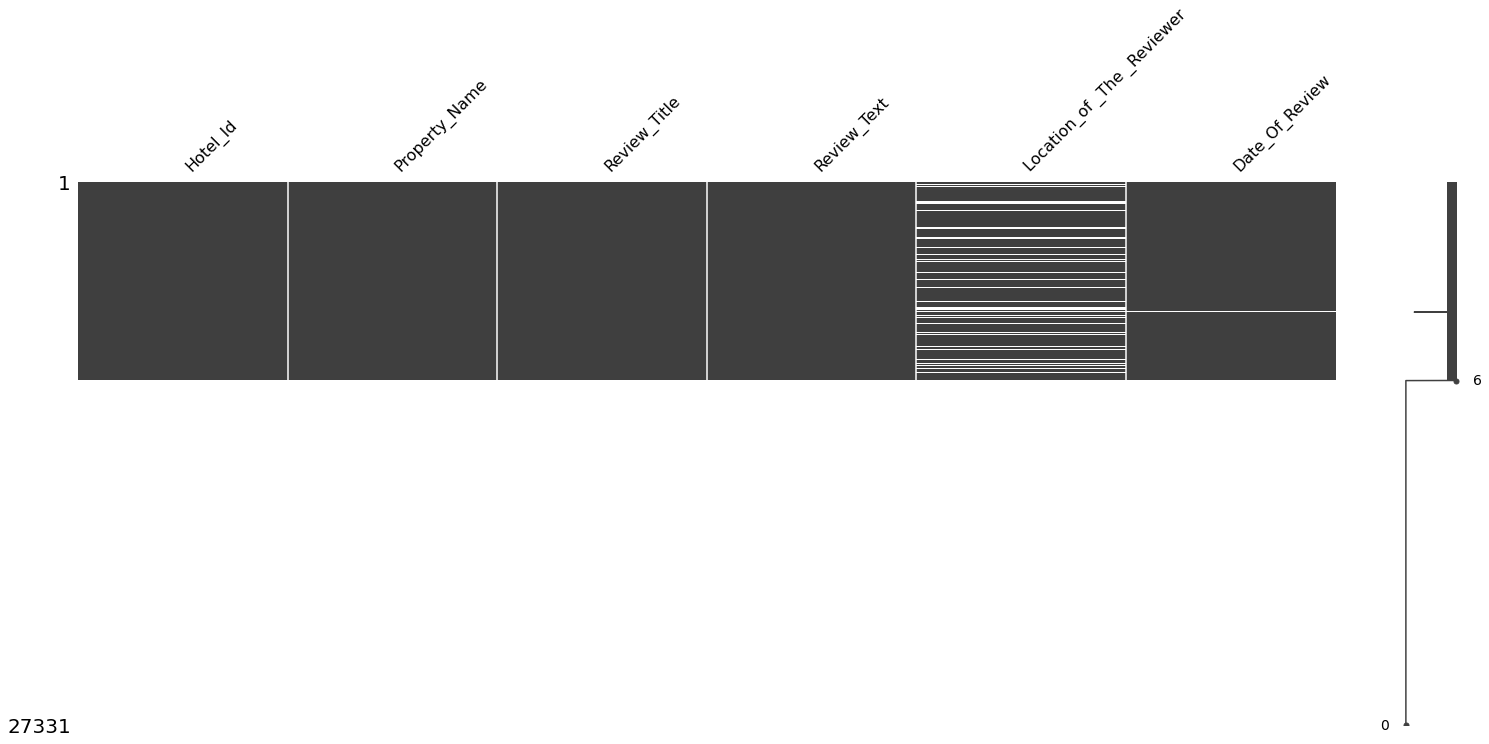

In [8]:
# Any data obtained is not pure. some of the features have missing values.
#To check the missing data from the dataset

msno.matrix(data)

In [9]:
# We do not need duplicates of the data. This command gets rid the duplicate data
data = data.drop_duplicates()

In [10]:
# After dropping the duplicate values we need to check the sum of the duplicates in our dataset
print(sum(data.duplicated())) 

0


In [11]:
# Easiest way to handle the missing value is by skipping/Dropping that missing value data
# below command will drop the missing values and will provide the pure data

data = data.dropna()

In [12]:
data.describe()

,Hotel_Id
count,8575.000
mean,4992.283
std,2887.016
min,1.000
25%,2491.500
50%,4984.000
75%,7501.500
max,9999.000


## Data Visualisation

In [13]:
#sns.distplot(data['Review_Rating']);

<AxesSubplot:>

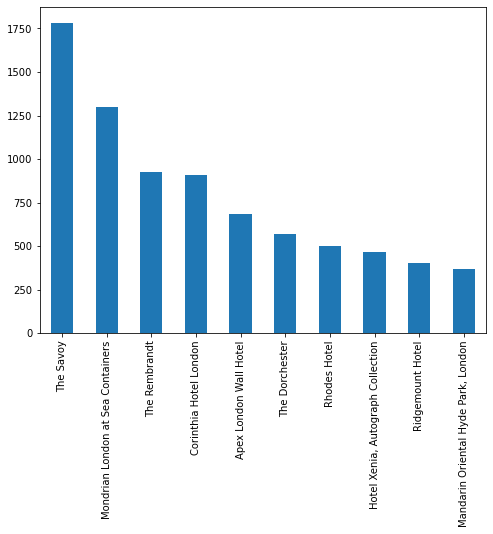

In [14]:
# The below graph provides visualization about which hotel has got maximum number of reviews 
# This provides top ten best hotels

Hotel_counts = data.Property_Name.value_counts()
Hotel_counts[:10].plot(kind='bar',figsize=(8,6))

<AxesSubplot:>

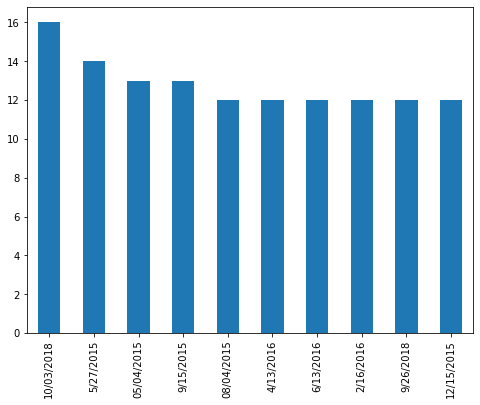

In [15]:
# The below bar graph provides analysis of data according to the date

Review_Date_count = data.Date_Of_Review.value_counts()
Review_Date_count[:10].plot(kind='bar', figsize = ( 8, 6))

In [16]:
# Another CSV file that provides only ratings according to the User_Id, and Hotel_Id

ratings = pd.read_csv('Ratings.csv')
ratings.head()

,User_Id,Hotel_Id,rating,timestamp
0,1,31,2.500,1260759144
1,1,1029,3.000,1260759179
2,1,1061,3.000,1260759182
3,1,1129,2.000,1260759185
4,1,1172,4.000,1260759205


In [17]:
# For collaborative filtering, we are required to merge two datasets in single dataset in this project

df = pd.merge(data, ratings, on='Hotel_Id') # From both of the data sets it merges the Hotel_Id
df.head()

,Hotel_Id,Property_Name,Review_Title,Review_Text,Location_of _The _Reviewer,Date_Of_Review,User_Id,rating,timestamp
0,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,7,3.000,851866703
1,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,9,4.000,938629179
2,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,13,5.000,1331380058
3,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,15,2.000,997938310
4,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,19,3.000,855190091


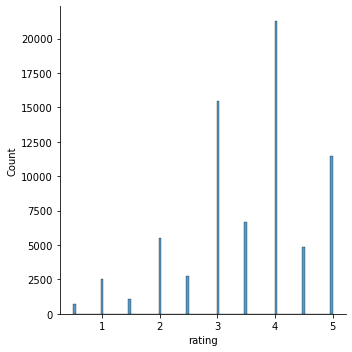

In [18]:
# sns plot of ratings
sns.displot(df['rating']);

In [19]:
# Calculate the average rating of hotels

mean_rating  = df
mean_rating = mean_rating.groupby ('Property_Name') ['rating'].mean()

In [20]:
# Create new dataset for average (mean) rating
new = pd.DataFrame()
new ['mean_rating'] = mean_rating

In [21]:
new.columns

Index(['mean_rating'], dtype='object')

<AxesSubplot:>

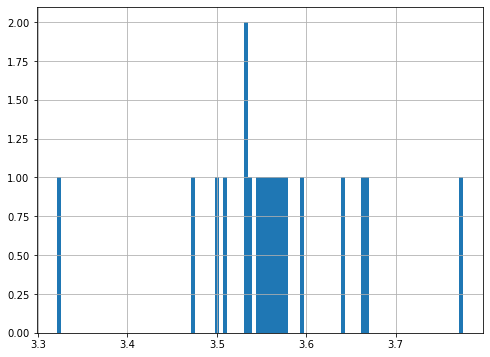

In [22]:
# Plot mean_rating (Average rating) graph

plt.figure (figsize = (8,6))
new['mean_rating'].hist(bins = 100)

<AxesSubplot:xlabel='rating', ylabel='count'>

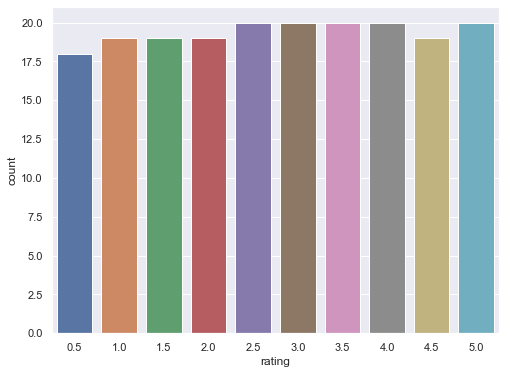

In [23]:
# This graph provides all the ratings 

Review_plot = df[["Property_Name","rating"]].drop_duplicates()
sns.set(font_scale = 1)
a4_dims = (8, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = "rating",data=Review_plot)

# Collaborative Filtering using KNN Algorithm


In [24]:
# This code provides total number of counts

combine_hotel_rating = df.dropna(axis = 0, subset = ['Property_Name'])
hotel_ratingCount = (combine_hotel_rating.
     groupby(by = ['Property_Name'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['Property_Name', 'totalRatingCount']]
    )
hotel_ratingCount.head()

,Property_Name,totalRatingCount
0,45 Park Lane - Dorchester Collection,394
1,A To Z Hotel,873
2,Apex London Wall Hotel,6354
3,"Bulgari Hotel, London",1362
4,City View Hotel,17


In [25]:
rating_with_totalRatingCount = combine_hotel_rating.merge(hotel_ratingCount, left_on = 'Property_Name', right_on = 'Property_Name', how = 'left')
rating_with_totalRatingCount.head()

,Hotel_Id,Property_Name,Review_Title,Review_Text,Location_of _The _Reviewer,Date_Of_Review,User_Id,rating,timestamp,totalRatingCount
0,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,7,3.000,851866703,6354
1,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,9,4.000,938629179,6354
2,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,13,5.000,1331380058,6354
3,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,15,2.000,997938310,6354
4,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,19,3.000,855190091,6354


In [26]:
print(hotel_ratingCount['totalRatingCount'].describe())

count      20.000
mean     3620.950
std      3944.127
min        17.000
25%       545.000
50%      2066.500
75%      5924.250
max     13968.000
Name: totalRatingCount, dtype: float64


In [27]:
# The recommendation system works on the basis of popularity of ratings. 
# For sake of simplicity I used popularity threshold.
# If the rating count of the hotel increases more than the popularity,
# it will simply count that hotel as most popular hotel.

popularity_threshold = 50
rating_popular_hotels= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_hotels.head()

,Hotel_Id,Property_Name,Review_Title,Review_Text,Location_of _The _Reviewer,Date_Of_Review,User_Id,rating,timestamp,totalRatingCount
0,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,7,3.000,851866703,6354
1,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,9,4.000,938629179,6354
2,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,13,5.000,1331380058,6354
3,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,15,2.000,997938310,6354
4,1.000,Apex London Wall Hotel,Ottima qualit‡ prezzo,Siamo stati a Londra per un week end ed abbiamo alloggiato in questo ottimo Hotel prenotato da a...,"Casale Monferrato, Italy",10/20/2012,19,3.000,855190091,6354


In [28]:
rating_popular_hotels.shape

(72402, 10)

In [29]:
# For the varification of raw echelon form, create pivot table

hotel_features_df = rating_popular_hotels.pivot_table(index='Property_Name',columns='User_Id',values='rating').fillna(0)

In [30]:
# KNN is non paramatric lazy learning method. 
# For User Based filtering purpose, KNN is best approch in collaborative filtering

hotel_features_df_matrix = csr_matrix(hotel_features_df.values)
hotel_features_df = hotel_features_df.reset_index()

In [31]:
vector = hotel_features_df.drop('Property_Name', axis = 1).to_numpy()

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
similarity = cosine_similarity(vector)

In [34]:
similarity

array([[1.        , 0.56595318, 0.50432343, 0.54272422, 0.50743982,
        0.51977847, 0.52174183, 0.54597278, 0.54348176, 0.51864527,
        0.51517965, 0.49268252, 0.53851346, 0.52948112, 0.5036353 ,
        0.52120908, 0.51188191, 0.5054735 , 0.54875409],
       [0.56595318, 1.        , 0.70231895, 0.64446472, 0.71810599,
        0.43662364, 0.70635322, 0.61390396, 0.68217227, 0.50301141,
        0.7006789 , 0.59594845, 0.67860231, 0.70555761, 0.70405301,
        0.63343959, 0.70033186, 0.71382956, 0.68754752],
       [0.50432343, 0.70231895, 1.        , 0.80108029, 0.94881371,
        0.39292063, 0.92141452, 0.62578879, 0.85689739, 0.49418591,
        0.95183595, 0.61286715, 0.90515781, 0.88022063, 0.9323327 ,
        0.75204193, 0.94380458, 0.95773499, 0.74007246],
       [0.54272422, 0.64446472, 0.80108029, 1.        , 0.79744774,
        0.41815661, 0.78223729, 0.6532407 , 0.77271422, 0.51373043,
        0.80414686, 0.65137193, 0.76747667, 0.75921486, 0.78530672,
        0.699

In [35]:
def recommend(hotel):
    index = hotel_features_df[hotel_features_df['Property_Name'] == hotel].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    
    recommended_list = []
    
    for i in distances[1:6]:
        recommended_list.append(hotel_features_df.iloc[i[0]]['Property_Name'])
    
        
    recommended_df = pd.DataFrame(recommended_list)
    recommended_df.columns = ['Top 5 Recommended Hotels']
    return recommended_df

In [36]:
index = hotel_features_df[hotel_features_df['Property_Name'] == 'Apex London Wall Hotel'].index[0]
distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])

recommended_list = []

for i in distances[1:6]:
    recommended_list.append(hotel_features_df.iloc[i[0]].Property_Name)
    
recommended_df = pd.DataFrame(recommended_list)
recommended_df.columns = ['Top 5 Recommended Hotels']
recommended_df

,Top 5 Recommended Hotels
0,The Savoy
1,Mondrian London at Sea Containers
2,Corinthia Hotel London
3,The Rembrandt
4,The Dorchester


In [37]:
recommend('Apex London Wall Hotel')

,Top 5 Recommended Hotels
0,The Savoy
1,Mondrian London at Sea Containers
2,Corinthia Hotel London
3,The Rembrandt
4,The Dorchester


In [38]:
pickle.dump(hotel_features_df,open('hotels.pkl','wb'))

In [39]:
hotel_features_df['Property_Name'].values

array(['45 Park Lane - Dorchester Collection', 'A To Z Hotel',
       'Apex London Wall Hotel', 'Bulgari Hotel, London',
       'Corinthia Hotel London', 'Hartley Hotel',
       'Hotel Xenia, Autograph Collection', 'London Guest House',
       'Mandarin Oriental Hyde Park, London', 'Marble Arch Hotel',
       'Mondrian London at Sea Containers', 'Newham Hotel',
       'Rhodes Hotel', 'Ridgemount Hotel', 'The Dorchester',
       'The Lanesborough', 'The Rembrandt', 'The Savoy',
       'The Wellesley Knightsbridge, a Luxury Collection Hotel, London'],
      dtype=object)

In [40]:
pickle.dump(hotel_features_df.to_dict(),open('hotel_dict.pkl','wb'))

In [41]:
pickle.dump(similarity,open('similarity.pkl','wb'))